In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import lightkurve as lk 
import pbjam as pb
import astropy.units as u

plt.rcParams['text.usetex'] = False

In [2]:
props = pd.read_pickle("11047.pkl")
df = pd.read_excel("Correspondence/TESS_results_excel.xlsx", skiprows=1)
df = df.rename(columns={df.columns[0]: 'TIC', df.columns[-1]: 'Flag'})
props_Δν = df

In [3]:
from os.path import isfile

template_r1 = "Data/TESS/GI 11047/r1/spoc/{:d}_psd_tot_nw.txt"
template_r2 = "Data/TESS/GI 11047/r2/spoc/{:d}_psd_av.txt"

def get_PG(TIC):
    fname = template_r1.format(int(TIC))
    if not isfile(fname):
        raise FileNotFoundError
        
    data = np.loadtxt(fname)
    ν = data[..., 0] * u.uHz
    P = u.Quantity(data[..., -1])
    
    return lk.Periodogram(ν, P)

In [4]:
def get_pbjam_kwargs(TIC):
    TIC = int(TIC)
    r = props.query(f"ID == '{TIC}'")
    r_Δν = props_Δν.query(f"TIC == {TIC}")
    
    ν_max = float(r_Δν['numax'])
    e_ν_max = float(r_Δν['numax_error'])
    
    Δν = float(r_Δν['dnu'])
    e_Δν = float(r_Δν['dnu_error'])
    
    teff = float(r['Teff'])
    e_teff = float(r['e_Teff'])
    
    bp_rp = float(r['gaiabp']) - float(r['gaiarp'])
    e_bp_rp = np.sqrt(float(r['e_gaiabp'])**2 + float(r['e_gaiarp'])**2)
    
    return {
        'numax': [ν_max, e_ν_max],
        'dnu': [Δν, e_Δν],
        'teff': [teff, e_teff],
        'bp_rp': [bp_rp, e_bp_rp]
    }

In [5]:
PATH = "PBJam/"

stars = [pb.star(f"TIC {ID}", get_PG(ID), 
               **get_pbjam_kwargs(ID), path=PATH) for ID in props.ID]

Starting KDE estimation


/home/joel/Git/PBjam/pbjam/priors.py:119: UserWarning: Only 1 star(s) near provided numax. Expanding the range to include ~100 stars.
  warnings.warn(f'Only {len(self.prior_data[idx])} star(s) near provided numax. ' +


Steps taken: 2000
Steps taken: 3000
Chains reached stationary state after 3000 iterations.
Starting asymptotic peakbagging
Steps taken: 2000
Chains reached stationary state after 2000 iterations.
Starting peakbagging


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [back, height2, height0, l2, l0, width2, width0]
The gelman-rubin statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [back, height2, height0, l2, l0, width2, width0]
The acceptance probability does not match the target. It is 0.660382449180527, but should be close to 0.9. Try to increase the number of tuning steps.
The estimated number of effective samples is smaller than 200 for some parameters.
/home/joel/.local/lib/python3.8/site-packages/pymc3/stats.py:990: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  return pd.concat([dforg, n_eff_pd,

Starting KDE estimation
Steps taken: 2000
Steps taken: 3000
Steps taken: 4000
Chains reached stationary state after 4000 iterations.
Starting asymptotic peakbagging
Steps taken: 2000
Steps taken: 3000
Steps taken: 4000
Steps taken: 5000
Chains reached stationary state after 5000 iterations.
Starting peakbagging


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [back, height2, height0, l2, l0, width2, width0]
The gelman-rubin statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [back, height2, height0, l2, l0, width2, width0]
The estimated number of effective samples is smaller than 200 for some parameters.
/home/joel/.local/lib/python3.8/site-packages/pymc3/stats.py:990: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  return pd.concat([dforg, n_eff_pd, rhat_pd],


Starting KDE estimation


/home/joel/Git/PBjam/pbjam/priors.py:119: UserWarning: Only 6 star(s) near provided numax. Expanding the range to include ~100 stars.
  warnings.warn(f'Only {len(self.prior_data[idx])} star(s) near provided numax. ' +


Steps taken: 2000
Chains reached stationary state after 2000 iterations.
Starting asymptotic peakbagging


/usr/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


Failed to peakbag TIC 55270123
Starting KDE estimation
Steps taken: 2000
Steps taken: 3000
Steps taken: 4000
Steps taken: 5000
Steps taken: 6000
Chains reached stationary state after 6000 iterations.
Starting asymptotic peakbagging
Steps taken: 2000
Steps taken: 3000
Steps taken: 4000
Steps taken: 5000
Steps taken: 6000
Steps taken: 7000
Steps taken: 8000
Chains reached stationary state after 8000 iterations.
Starting peakbagging


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [back, height2, height0, l2, l0, width2, width0]
The estimated number of effective samples is smaller than 200 for some parameters.
/home/joel/.local/lib/python3.8/site-packages/pymc3/stats.py:990: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  return pd.concat([dforg, n_eff_pd, rhat_pd],


Starting KDE estimation


/home/joel/Git/PBjam/pbjam/priors.py:119: UserWarning: Only 0 star(s) near provided numax. Expanding the range to include ~100 stars.
  warnings.warn(f'Only {len(self.prior_data[idx])} star(s) near provided numax. ' +


Steps taken: 2000
Chains reached stationary state after 2000 iterations.
Starting asymptotic peakbagging
Steps taken: 2000
Chains reached stationary state after 2000 iterations.
Starting peakbagging


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [back, height2, height0, l2, l0, width2, width0]
The estimated number of effective samples is smaller than 200 for some parameters.
/home/joel/.local/lib/python3.8/site-packages/pymc3/stats.py:990: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  return pd.concat([dforg, n_eff_pd, rhat_pd],


Starting KDE estimation


/home/joel/Git/PBjam/pbjam/priors.py:119: UserWarning: Only 9 star(s) near provided numax. Expanding the range to include ~100 stars.
  warnings.warn(f'Only {len(self.prior_data[idx])} star(s) near provided numax. ' +


Steps taken: 2000
Steps taken: 3000
Steps taken: 4000
Chains reached stationary state after 4000 iterations.
Starting asymptotic peakbagging
Steps taken: 2000
Steps taken: 3000
Steps taken: 4000
Steps taken: 5000
Steps taken: 6000
Steps taken: 7000
Chains reached stationary state after 7000 iterations.
Starting peakbagging


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [back, height2, height0, l2, l0, width2, width0]
/home/joel/.local/lib/python3.8/site-packages/pymc3/stats.py:990: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  return pd.concat([dforg, n_eff_pd, rhat_pd],


Starting KDE estimation


/home/joel/Git/PBjam/pbjam/priors.py:119: UserWarning: Only 4 star(s) near provided numax. Expanding the range to include ~100 stars.
  warnings.warn(f'Only {len(self.prior_data[idx])} star(s) near provided numax. ' +


Steps taken: 2000
Steps taken: 3000
Steps taken: 4000
Steps taken: 5000
Chains reached stationary state after 5000 iterations.
Starting asymptotic peakbagging
Steps taken: 2000
Steps taken: 3000
Steps taken: 4000
Steps taken: 5000
Chains reached stationary state after 5000 iterations.
Starting peakbagging


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [back, height2, height0, l2, l0, width2, width0]
The number of effective samples is smaller than 25% for some parameters.
/home/joel/.local/lib/python3.8/site-packages/pymc3/stats.py:990: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  return pd.concat([dforg, n_eff_pd, rhat_pd],


Starting KDE estimation


/home/joel/Git/PBjam/pbjam/priors.py:119: UserWarning: Only 1 star(s) near provided numax. Expanding the range to include ~100 stars.
  warnings.warn(f'Only {len(self.prior_data[idx])} star(s) near provided numax. ' +


Steps taken: 2000
Steps taken: 3000
Chains reached stationary state after 3000 iterations.
Starting asymptotic peakbagging


/usr/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


Failed to peakbag TIC 150062447
Starting KDE estimation
Steps taken: 2000
Steps taken: 3000
Steps taken: 4000
Chains reached stationary state after 4000 iterations.
Starting asymptotic peakbagging
Steps taken: 2000
Chains reached stationary state after 2000 iterations.
Starting peakbagging


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [back, height2, height0, l2, l0, width2, width0]
The number of effective samples is smaller than 25% for some parameters.
/home/joel/.local/lib/python3.8/site-packages/pymc3/stats.py:990: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  return pd.concat([dforg, n_eff_pd, rhat_pd],


Starting KDE estimation
Steps taken: 2000
Steps taken: 3000
Steps taken: 4000
Chains reached stationary state after 4000 iterations.
Starting asymptotic peakbagging


/usr/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/joel/Git/PBjam/pbjam/priors.py:119: UserWarning: Only 6 star(s) near provided numax. Expanding the range to include ~100 stars.
  warnings.warn(f'Only {len(self.prior_data[idx])} star(s) near provided numax. ' +


Failed to peakbag TIC 150393198
Starting KDE estimation
Steps taken: 2000
Chains reached stationary state after 2000 iterations.
Starting asymptotic peakbagging
Steps taken: 2000
Chains reached stationary state after 2000 iterations.
Starting peakbagging


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [back, height2, height0, l2, l0, width2, width0]
The estimated number of effective samples is smaller than 200 for some parameters.
/home/joel/.local/lib/python3.8/site-packages/pymc3/stats.py:990: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  return pd.concat([dforg, n_eff_pd, rhat_pd],


Starting KDE estimation


/home/joel/Git/PBjam/pbjam/priors.py:119: UserWarning: Only 3 star(s) near provided numax. Expanding the range to include ~100 stars.
  warnings.warn(f'Only {len(self.prior_data[idx])} star(s) near provided numax. ' +


Steps taken: 2000
Steps taken: 3000
Chains reached stationary state after 3000 iterations.
Starting asymptotic peakbagging
Steps taken: 2000
Chains reached stationary state after 2000 iterations.
Starting peakbagging


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [back, height2, height0, l2, l0, width2, width0]
The gelman-rubin statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [back, height2, height0, l2, l0, width2, width0]
The acceptance probability does not match the target. It is 0.7741707537323104, but should be close to 0.9. Try to increase the number of tuning steps.
The gelman-rubin statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [back, height2, h

Starting KDE estimation


/home/joel/Git/PBjam/pbjam/priors.py:119: UserWarning: Only 9 star(s) near provided numax. Expanding the range to include ~100 stars.
  warnings.warn(f'Only {len(self.prior_data[idx])} star(s) near provided numax. ' +


Steps taken: 2000
Chains reached stationary state after 2000 iterations.
Starting asymptotic peakbagging
Steps taken: 2000
Steps taken: 3000
Steps taken: 4000
Steps taken: 5000
Chains reached stationary state after 5000 iterations.


Starting peakbagging


Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
INFO:pymc3:Initializing NUTS using adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
INFO:pymc3:Multiprocess sampling (3 chains in 3 jobs)
NUTS: [back, height2, height0, l2, l0, width2, width0]
INFO:pymc3:NUTS: [back, height2, height0, l2, l0, width2, width0]
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.
/home/joel/.local/lib/python3.8/site-packages/pymc3/stats.py:990: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  return pd.concat([dforg, n_eff_pd, rhat_pd],


Starting KDE estimation


/home/joel/Git/PBjam/pbjam/priors.py:119: UserWarning: Only 4 star(s) near provided numax. Expanding the range to include ~100 stars.
  warnings.warn(f'Only {len(self.prior_data[idx])} star(s) near provided numax. ' +


Steps taken: 2000
Chains reached stationary state after 2000 iterations.
Starting asymptotic peakbagging


/usr/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/joel/Git/PBjam/pbjam/priors.py:119: UserWarning: Only 5 star(s) near provided numax. Expanding the range to include ~100 stars.
  warnings.warn(f'Only {len(self.prior_data[idx])} star(s) near provided numax. ' +


Failed to peakbag TIC 167342488
Starting KDE estimation
Steps taken: 2000
Steps taken: 3000
Chains reached stationary state after 3000 iterations.
Starting asymptotic peakbagging
Steps taken: 2000
Chains reached stationary state after 2000 iterations.
Starting peakbagging


Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
INFO:pymc3:Initializing NUTS using adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
INFO:pymc3:Multiprocess sampling (3 chains in 3 jobs)
NUTS: [back, height2, height0, l2, l0, width2, width0]
INFO:pymc3:NUTS: [back, height2, height0, l2, l0, width2, width0]
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.
/home/joel/.local/lib/python3.8/site-packages/pymc3/stats.py:990: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  return pd.concat([dforg, n_eff_pd, rhat_pd],


Starting KDE estimation


/home/joel/Git/PBjam/pbjam/priors.py:119: UserWarning: Only 2 star(s) near provided numax. Expanding the range to include ~100 stars.
  warnings.warn(f'Only {len(self.prior_data[idx])} star(s) near provided numax. ' +


Steps taken: 2000
Chains reached stationary state after 2000 iterations.
Starting asymptotic peakbagging
Steps taken: 2000
Steps taken: 3000
Chains reached stationary state after 3000 iterations.
Starting peakbagging


Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
INFO:pymc3:Initializing NUTS using adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
INFO:pymc3:Multiprocess sampling (3 chains in 3 jobs)
NUTS: [back, height2, height0, l2, l0, width2, width0]
INFO:pymc3:NUTS: [back, height2, height0, l2, l0, width2, width0]
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.
/home/joel/.local/lib/python3.8/site-packages/pymc3/stats.py:990: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  return pd.concat([dforg, n_eff_pd, rhat_pd],


Starting KDE estimation


/home/joel/Git/PBjam/pbjam/priors.py:119: UserWarning: Only 2 star(s) near provided numax. Expanding the range to include ~100 stars.
  warnings.warn(f'Only {len(self.prior_data[idx])} star(s) near provided numax. ' +


Steps taken: 2000
Chains reached stationary state after 2000 iterations.
Starting asymptotic peakbagging


/usr/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/joel/Git/PBjam/pbjam/priors.py:119: UserWarning: Only 3 star(s) near provided numax. Expanding the range to include ~100 stars.
  warnings.warn(f'Only {len(self.prior_data[idx])} star(s) near provided numax. ' +


Failed to peakbag TIC 299899690
Starting KDE estimation
Steps taken: 2000
Steps taken: 3000
Chains reached stationary state after 3000 iterations.
Starting asymptotic peakbagging
Steps taken: 2000
Chains reached stationary state after 2000 iterations.
Starting peakbagging


Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
INFO:pymc3:Initializing NUTS using adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
INFO:pymc3:Multiprocess sampling (3 chains in 3 jobs)
NUTS: [back, height2, height0, l2, l0, width2, width0]
INFO:pymc3:NUTS: [back, height2, height0, l2, l0, width2, width0]
The gelman-rubin statistic is larger than 1.2 for some parameters.
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.
Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
INFO:pymc3:Initializing NUTS using adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
INFO:pymc3:Multiprocess sampling (3 chains in 3 jobs)
NUTS: [back, height2, height0, l2, l0, width2, width0]
INFO:pymc3:NUTS: [back, height2, height0, l2, l0, width2, width0]

Starting KDE estimation


/home/joel/Git/PBjam/pbjam/priors.py:119: UserWarning: Only 1 star(s) near provided numax. Expanding the range to include ~100 stars.
  warnings.warn(f'Only {len(self.prior_data[idx])} star(s) near provided numax. ' +


Steps taken: 2000
Chains reached stationary state after 2000 iterations.
Starting asymptotic peakbagging
Steps taken: 2000
Steps taken: 3000
Chains reached stationary state after 3000 iterations.
Starting peakbagging


Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
INFO:pymc3:Initializing NUTS using adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
INFO:pymc3:Multiprocess sampling (3 chains in 3 jobs)
NUTS: [back, height2, height0, l2, l0, width2, width0]
INFO:pymc3:NUTS: [back, height2, height0, l2, l0, width2, width0]
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.
/home/joel/.local/lib/python3.8/site-packages/pymc3/stats.py:990: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  return pd.concat([dforg, n_eff_pd, rhat_pd],


Starting KDE estimation
Steps taken: 2000
Steps taken: 3000
Steps taken: 4000
Chains reached stationary state after 4000 iterations.
Starting asymptotic peakbagging
Steps taken: 2000
Steps taken: 3000
Chains reached stationary state after 3000 iterations.
Starting peakbagging


Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
INFO:pymc3:Initializing NUTS using adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
INFO:pymc3:Multiprocess sampling (3 chains in 3 jobs)
NUTS: [back, height2, height0, l2, l0, width2, width0]
INFO:pymc3:NUTS: [back, height2, height0, l2, l0, width2, width0]
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.
/home/joel/.local/lib/python3.8/site-packages/pymc3/stats.py:990: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  return pd.concat([dforg, n_eff_pd, rhat_pd],


Starting KDE estimation


/home/joel/Git/PBjam/pbjam/priors.py:119: UserWarning: Only 1 star(s) near provided numax. Expanding the range to include ~100 stars.
  warnings.warn(f'Only {len(self.prior_data[idx])} star(s) near provided numax. ' +


Steps taken: 2000
Chains reached stationary state after 2000 iterations.
Starting asymptotic peakbagging
Steps taken: 2000
Chains reached stationary state after 2000 iterations.
Starting peakbagging


Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
INFO:pymc3:Initializing NUTS using adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
INFO:pymc3:Multiprocess sampling (3 chains in 3 jobs)
NUTS: [back, height2, height0, l2, l0, width2, width0]
INFO:pymc3:NUTS: [back, height2, height0, l2, l0, width2, width0]
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.
/home/joel/.local/lib/python3.8/site-packages/pymc3/stats.py:990: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  return pd.concat([dforg, n_eff_pd, rhat_pd],


Starting KDE estimation


/home/joel/Git/PBjam/pbjam/priors.py:119: UserWarning: Only 6 star(s) near provided numax. Expanding the range to include ~100 stars.
  warnings.warn(f'Only {len(self.prior_data[idx])} star(s) near provided numax. ' +


Steps taken: 2000
Chains reached stationary state after 2000 iterations.
Starting asymptotic peakbagging
Steps taken: 2000
Chains reached stationary state after 2000 iterations.
Starting peakbagging


Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
INFO:pymc3:Initializing NUTS using adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
INFO:pymc3:Multiprocess sampling (3 chains in 3 jobs)
NUTS: [back, height2, height0, l2, l0, width2, width0]
INFO:pymc3:NUTS: [back, height2, height0, l2, l0, width2, width0]
The gelman-rubin statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
INFO:pymc3:The gelman-rubin statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.
Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
INFO:pymc3:Initializing NUTS using adapt_diag...
Multiprocess sampling (3 chains in 3 jobs

Starting KDE estimation


/home/joel/Git/PBjam/pbjam/priors.py:119: UserWarning: Only 3 star(s) near provided numax. Expanding the range to include ~100 stars.
  warnings.warn(f'Only {len(self.prior_data[idx])} star(s) near provided numax. ' +


Steps taken: 2000
Steps taken: 3000
Chains reached stationary state after 3000 iterations.
Starting asymptotic peakbagging


/usr/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


Failed to peakbag TIC 374859230


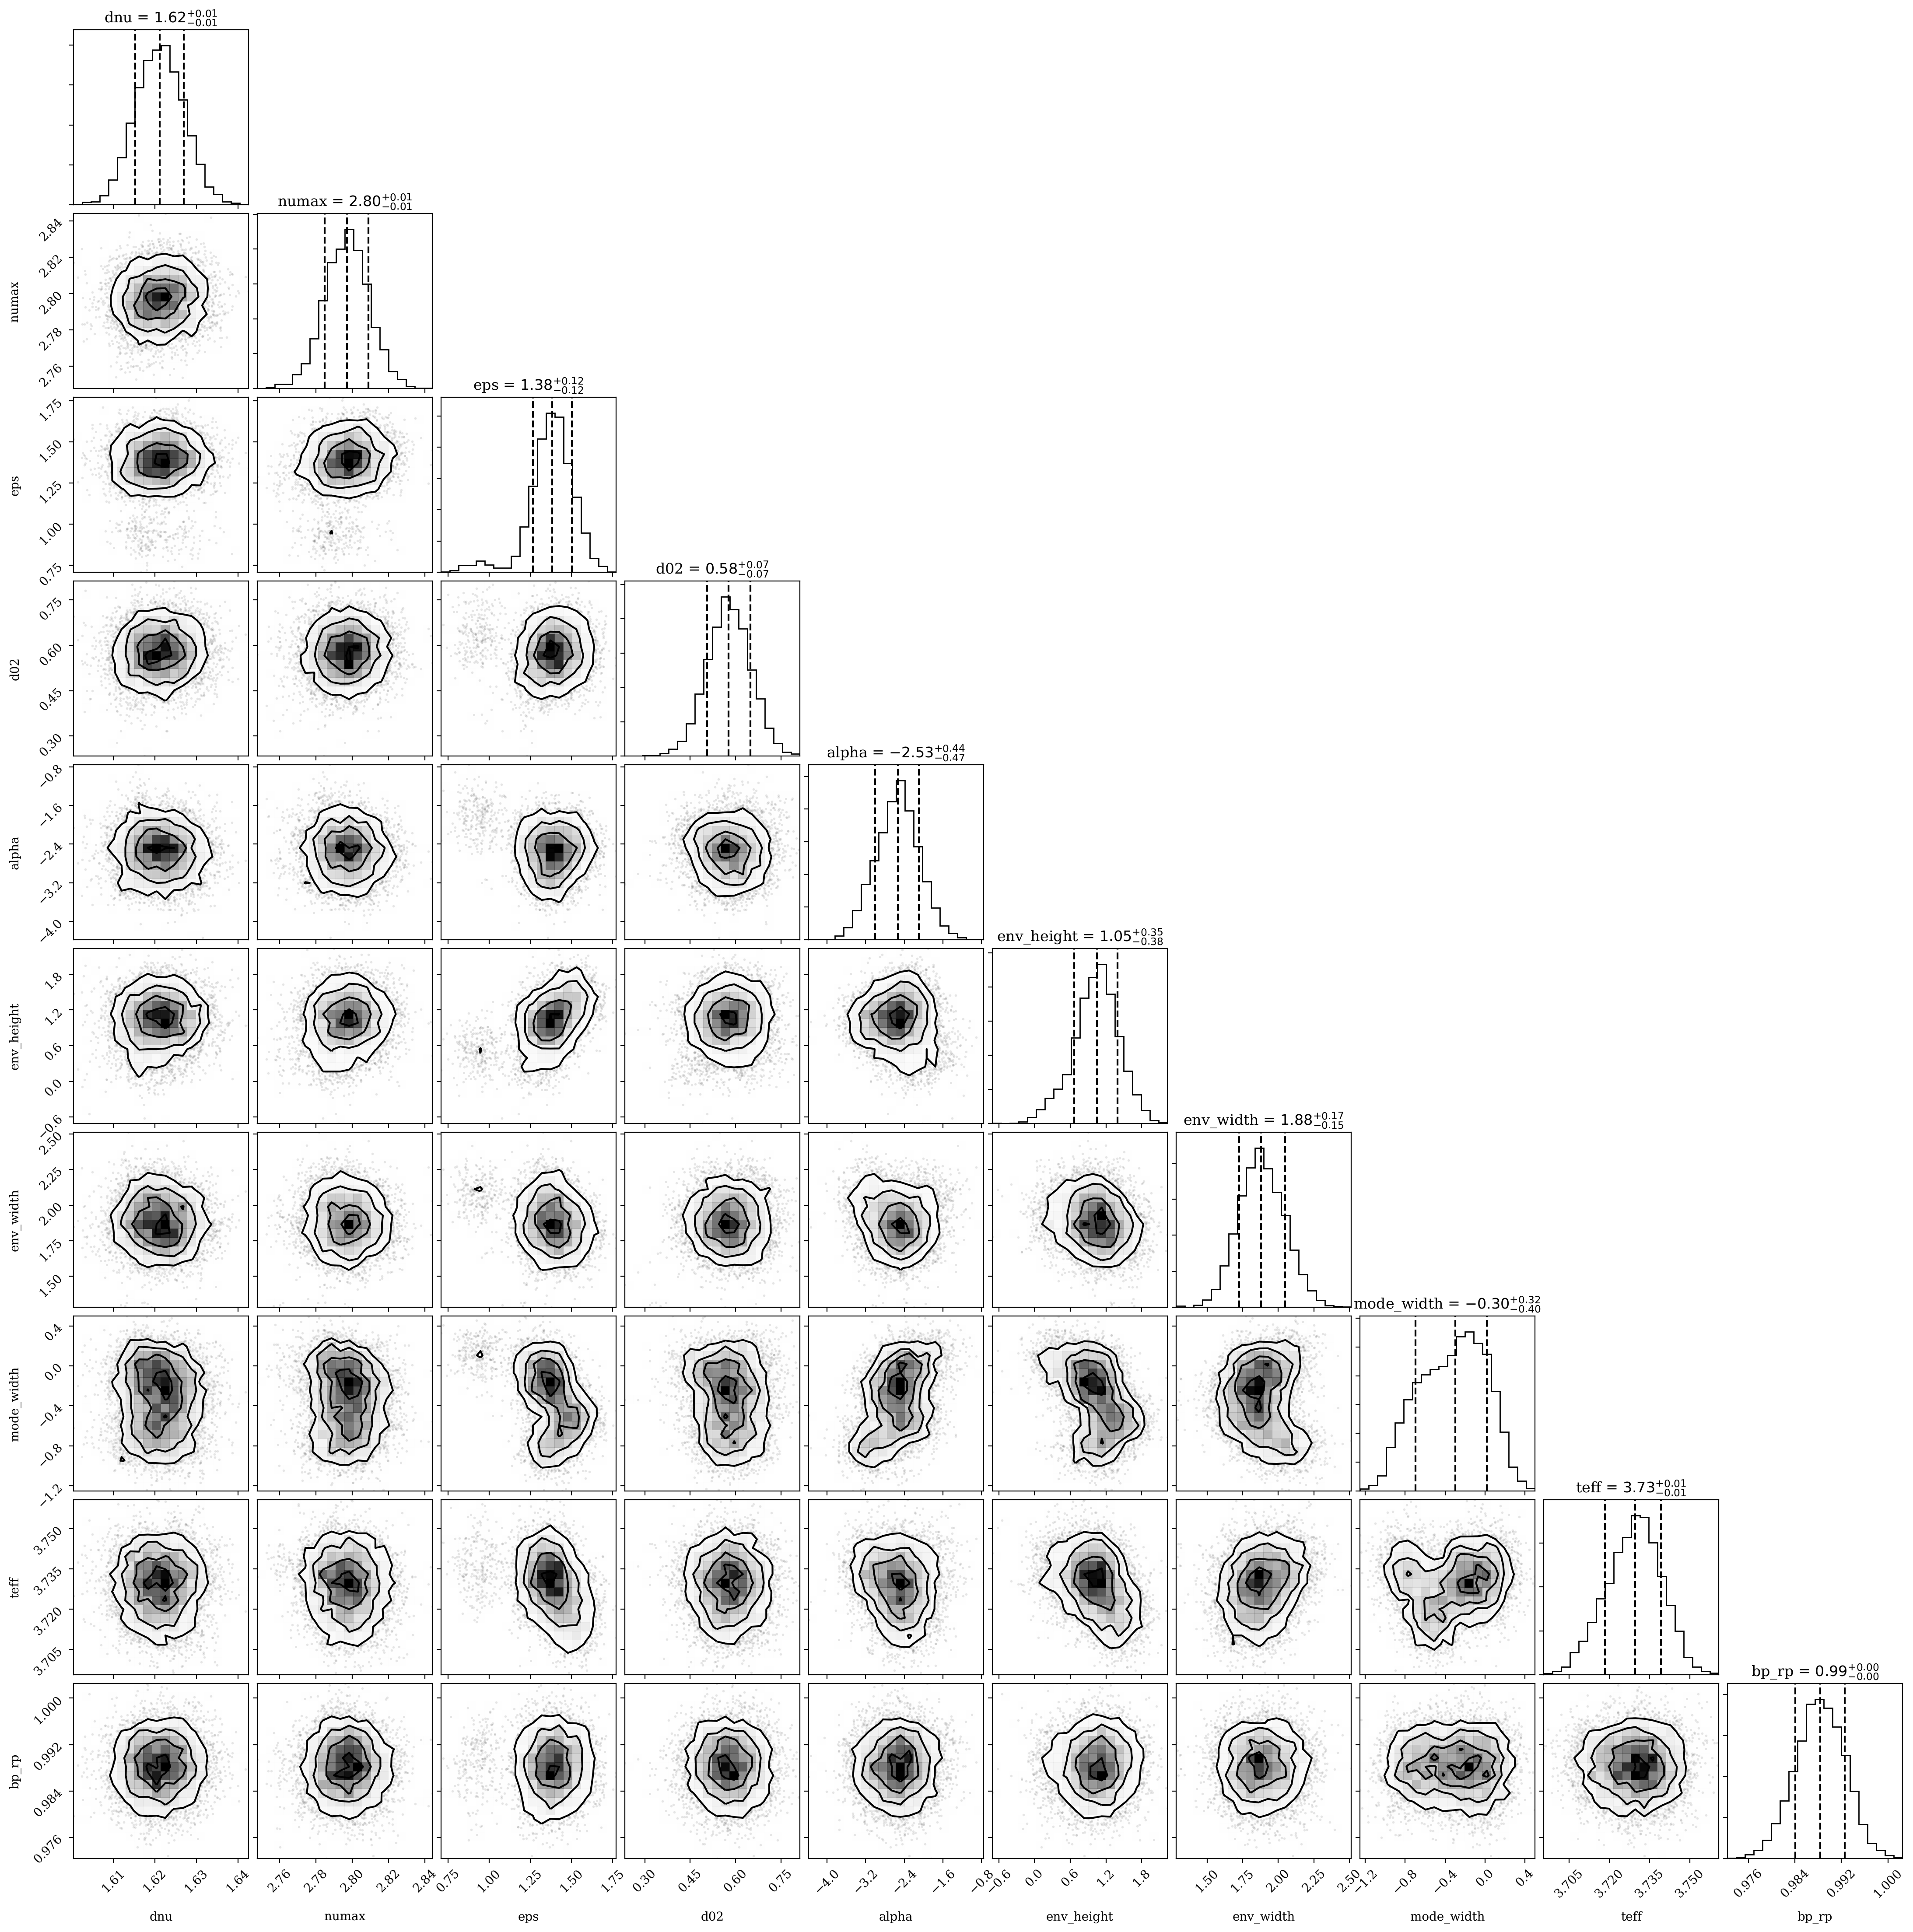

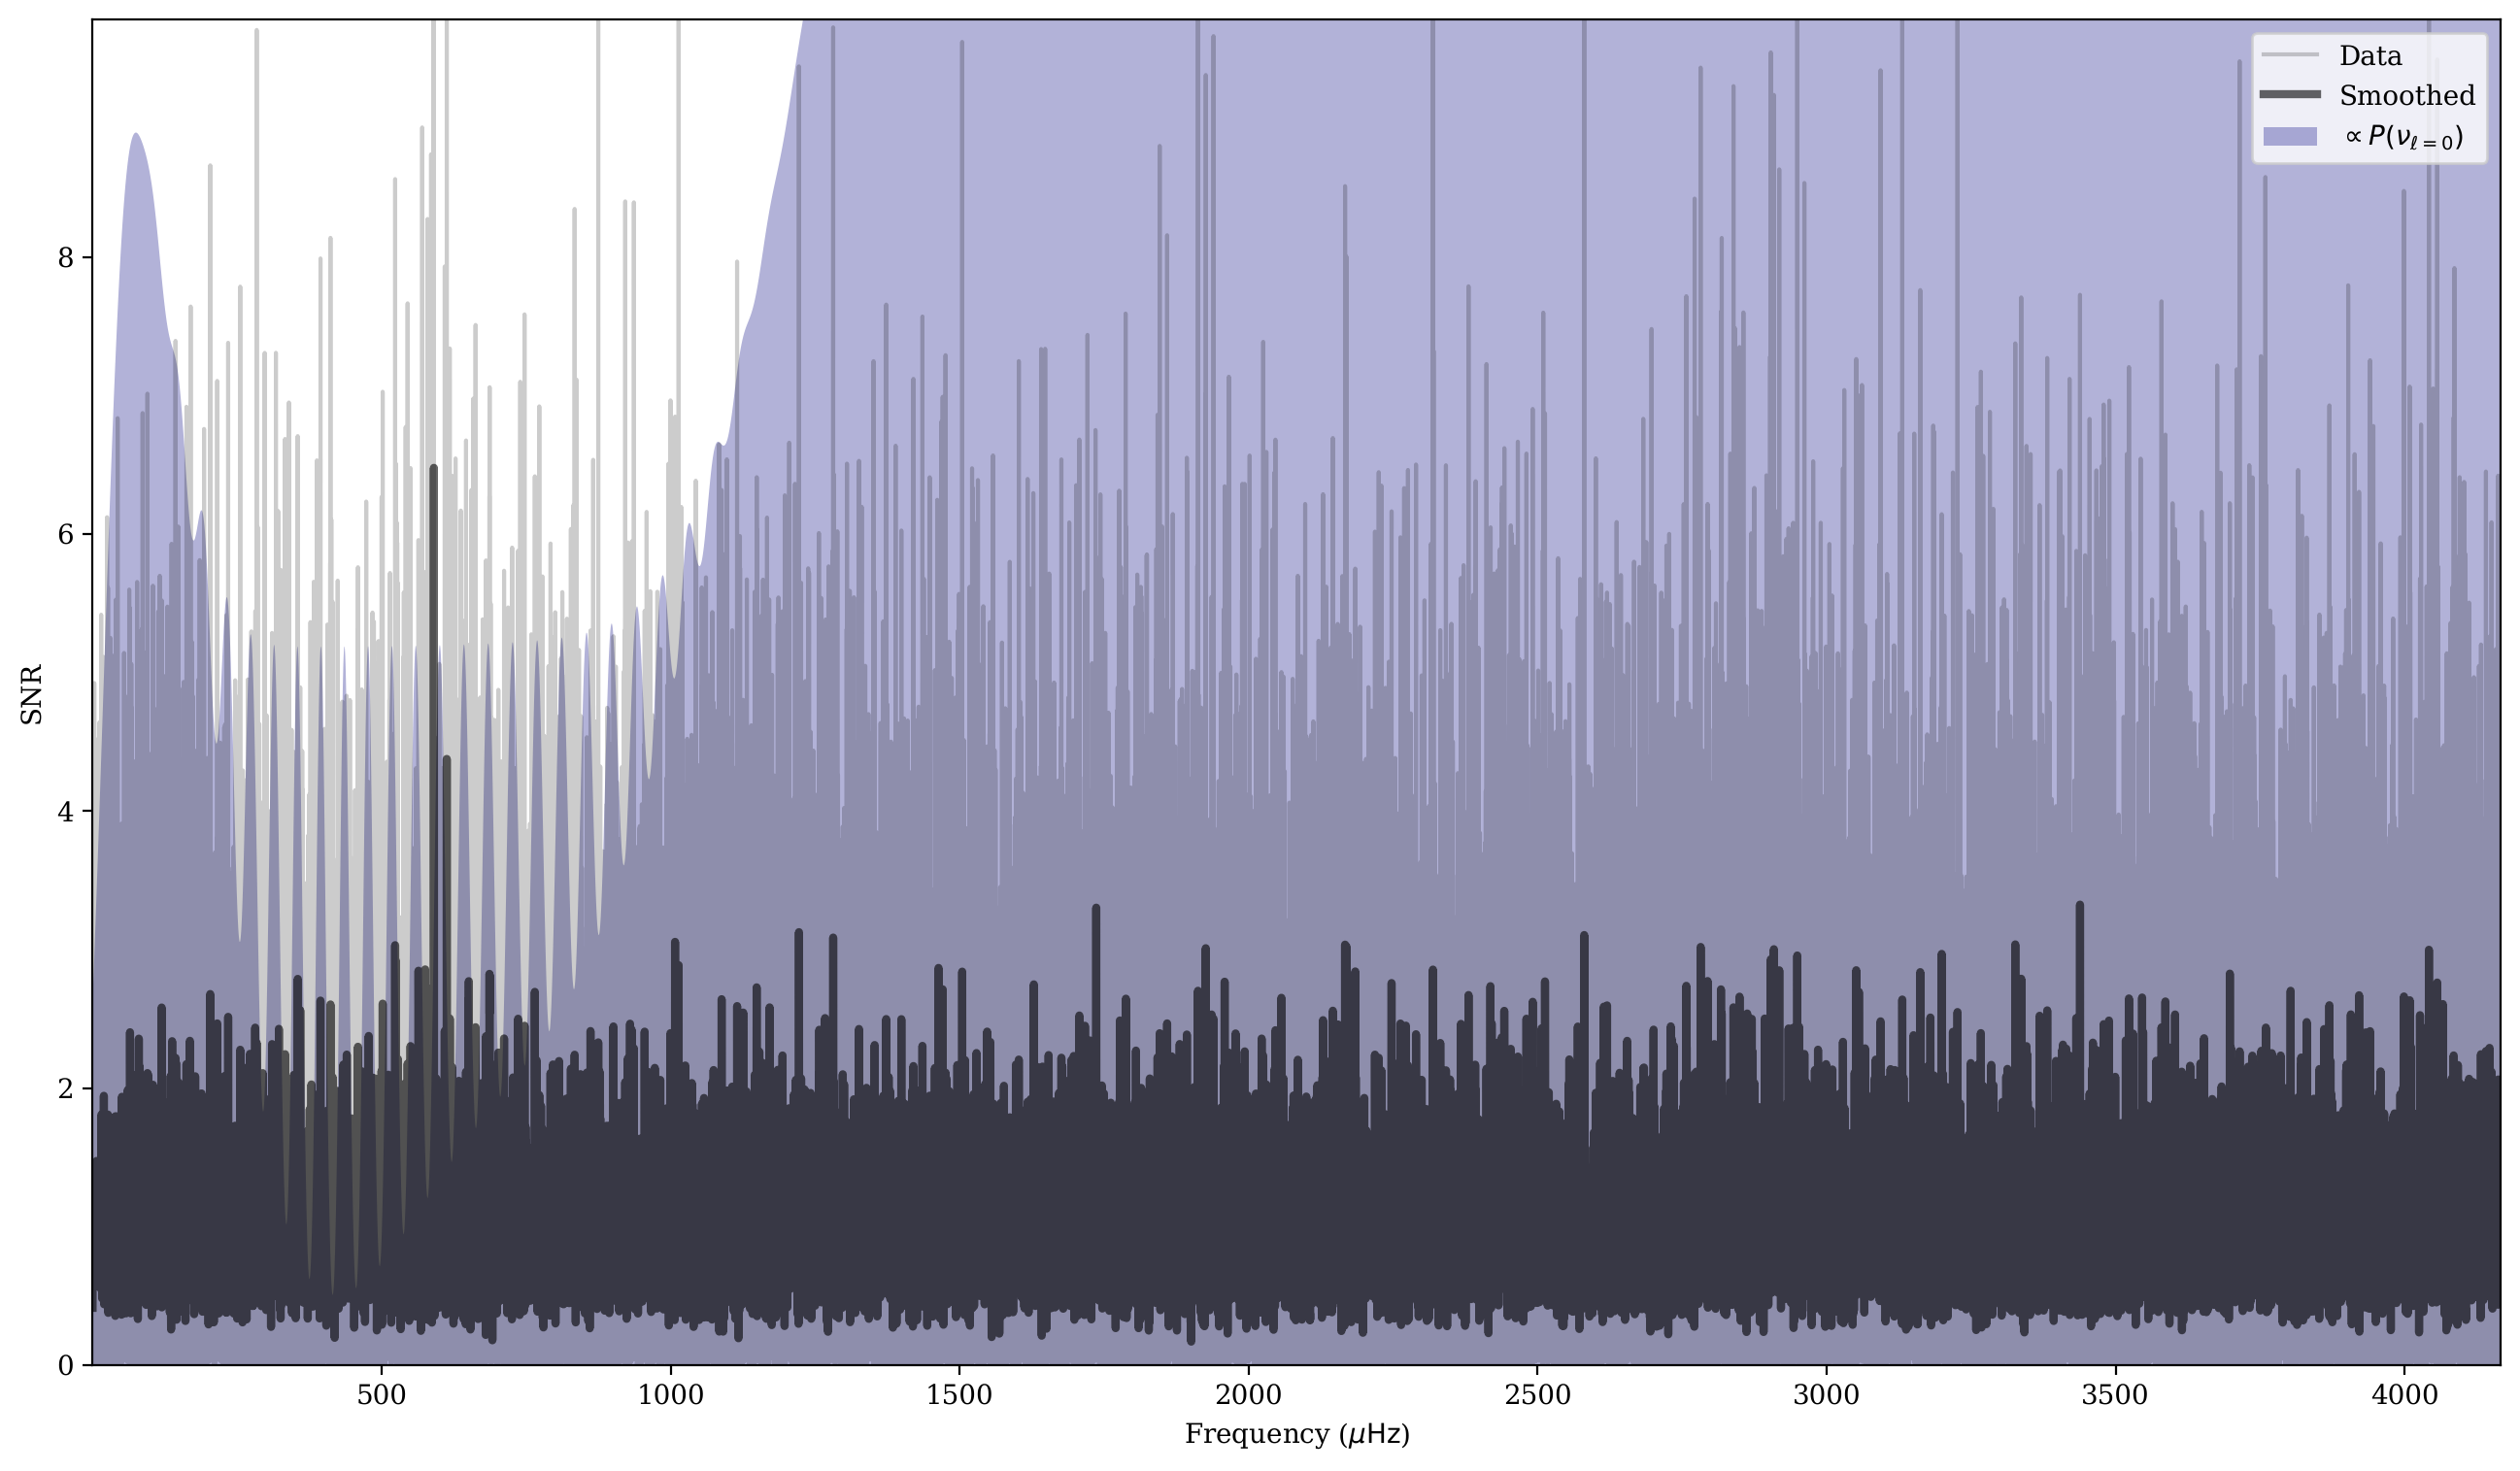

In [6]:
for star in stars:
    plt.close('all')
    try:
        star(nthreads=3)
        plt.close('all')
        star.peakbag.plot_echelle()
        plt.title(f"Echelle diagram for {star.ID}")
        plt.savefig(f"{PATH}/{star.ID}/echelle.png")
        plt.close('all')
    except ValueError:
        print(f"Failed to peakbag {star.ID}")

In [21]:
star = stars[16]
star.ID

'TIC 299899690'

In [26]:
star(nthreads=3)
plt.close('all')
star.peakbag.plot_echelle()
plt.title(f"Echelle diagram for {star.ID}")
plt.savefig(f"{PATH}/{star.ID}/echelle.png")
plt.close('all')

Starting KDE estimation


/home/joel/Git/PBjam/pbjam/priors.py:119: UserWarning: Only 2 star(s) near provided numax. Expanding the range to include ~100 stars.
  warnings.warn(f'Only {len(self.prior_data[idx])} star(s) near provided numax. ' +


Steps taken: 2000
Chains reached stationary state after 2000 iterations.
Starting asymptotic peakbagging
Steps taken: 2000
Chains reached stationary state after 2000 iterations.
Starting peakbagging


Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
INFO:pymc3:Initializing NUTS using adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
INFO:pymc3:Multiprocess sampling (3 chains in 3 jobs)
NUTS: [back, height2, height0, l2, l0, width2, width0]
INFO:pymc3:NUTS: [back, height2, height0, l2, l0, width2, width0]
The acceptance probability does not match the target. It is 0.8411756543651082, but should be close to 0.9. Try to increase the number of tuning steps.
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.
/home/joel/.local/lib/python3.8/site-packages/pymc3/stats.py:990: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  return pd.concat([dforg, n_eff_pd, rhat_pd],
